In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

# Two data sets 

## 1. Irises 
We will use k-nearest neighbors to predict species of an iris from physical properties of the flower.

## Part 1: Classifying irises
Choose $\textbf{two pairs}$ of features from 'sepal_length', 'sepal_width', 'petal_length', and 'petal_width' to predict 'species_label'. $\textbf{For each pair you choose}$:

1. Make a scatterplot of the data (using the two features you chose for x and y) with hue showing the species.

2. Define the feature set $X$ (vectors containing the values for the two features you chose) and the target set $y$. Make a train-test split using 30% of the data for a test set. 

3. Scale the $X$ variables using StandardScaler(). 

4. Use k-nearest neighbors with number of neighbors $n = 1, 2, 3, ..., 25$ and record the accuracy scores on the training and test sets. Make a visualization of these scores (like we did in class with the mpg data set). 

    1. At which point does the accuracy on the test set start to level off? (How many neighbors?)
     

    2. What is the  accuracy on the test set at this point?

5. Based on your work in 3, choose the number of neighbors to use and train a model with your training data. Check the accuracy score on both the training set and the test set. Use mlxtend.plot_decision_regions( ) to plot the decision regions for the training set and the test set.

In [4]:
iris = sns.load_dataset('iris') # This dataset about irises is included in seaborn.
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's convert the species to numbers. sklearn needs numerical variables. Let's look at the unique values for 'species' and make a new column of numerical labels for the species.

In [5]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
species_dict = {
    'setosa' : 0,
    'versicolor' : 1,
    'virginica' :2
}

In [7]:
iris['species_label'] = iris['species'].map(species_dict)

In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_label
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


# 1.1

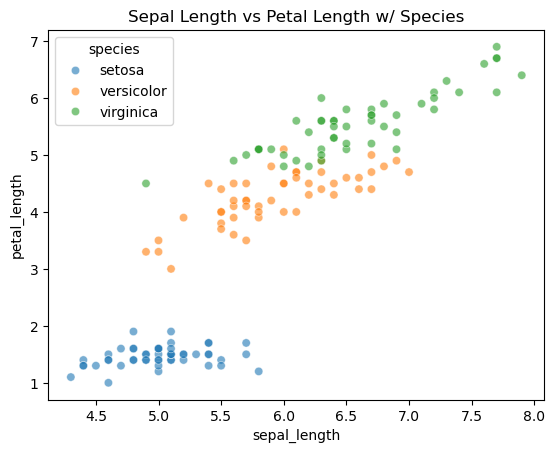

In [9]:
fig, ax = plt.subplots()

sns.scatterplot(x = 'sepal_length', 
                y = 'petal_length', 
                data = iris, 
                hue='species', 
                alpha=0.6)
plt.title('Sepal Length vs Petal Length w/ Species')
plt.show()

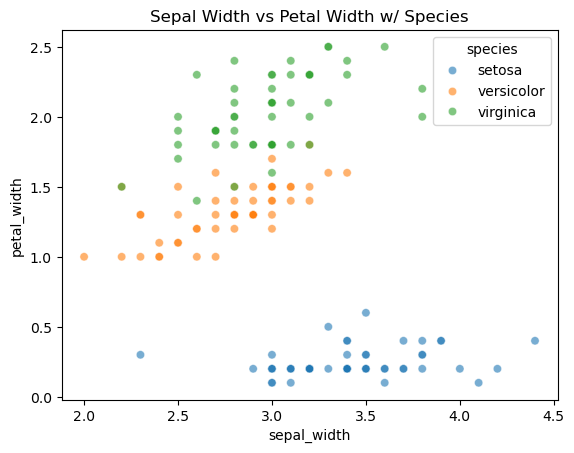

In [10]:
fig, ax = plt.subplots()

sns.scatterplot(x = 'sepal_width', 
                y = 'petal_width', 
                data = iris, 
                hue='species', 
                alpha=0.6)
plt.title('Sepal Width vs Petal Width w/ Species')
plt.show()

# 1.2

In [11]:
X = iris[['sepal_length', 'petal_length']]
y = iris['species_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=440) 

# 1.3

In [12]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = ['sepal_length', 'petal_length'])
X_test = pd.DataFrame(scaler.transform(X_test), columns = ['sepal_length', 'petal_length'])
#X_train['sepal_length'].describe(), X_train['petal_length'].describe()

# 1.4

4. Use k-nearest neighbors with number of neighbors $n = 1, 2, 3, ..., 25$ and record the accuracy scores on the training and test sets. Make a visualization of these scores (like we did in class with the mpg data set).
    1. At which point does the accuracy on the test set start to level off? (How many neighbors?)
     

    2. What is the  accuracy on the test set at this point?

In [13]:
knn=KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
knn.score(X_train, y_train)

0.9619047619047619

In [16]:
knn.score(X_test, y_test)

0.9111111111111111

In [17]:
train_accuracies = {}
test_accuracies = {}
neighbors = range(1,26)
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    train_accuracies[n] = knn.score(X_train, y_train)
    test_accuracies[n] = knn.score(X_test, y_test)

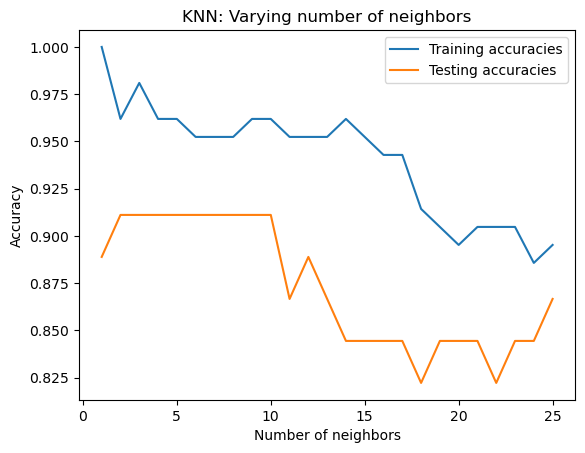

In [18]:
fig, ax = plt.subplots()
ax.plot(neighbors, train_accuracies.values(), label='Training accuracies')
ax.plot(neighbors, test_accuracies.values(), label='Testing accuracies')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN: Varying number of neighbors')
plt.legend()
plt.show()

In [19]:
'''
A. At which point does the accuracy on the test set start to level off? (How many neighbors?)
    It does not really level off but it a long line starts at t k=2 and ends at k=10 neighbors.

B. What is the accuracy on the test set at this point?
    0.9111
'''
print(test_accuracies)

{1: 0.8888888888888888, 2: 0.9111111111111111, 3: 0.9111111111111111, 4: 0.9111111111111111, 5: 0.9111111111111111, 6: 0.9111111111111111, 7: 0.9111111111111111, 8: 0.9111111111111111, 9: 0.9111111111111111, 10: 0.9111111111111111, 11: 0.8666666666666667, 12: 0.8888888888888888, 13: 0.8666666666666667, 14: 0.8444444444444444, 15: 0.8444444444444444, 16: 0.8444444444444444, 17: 0.8444444444444444, 18: 0.8222222222222222, 19: 0.8444444444444444, 20: 0.8444444444444444, 21: 0.8444444444444444, 22: 0.8222222222222222, 23: 0.8444444444444444, 24: 0.8444444444444444, 25: 0.8666666666666667}


# 1.5

In [243]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


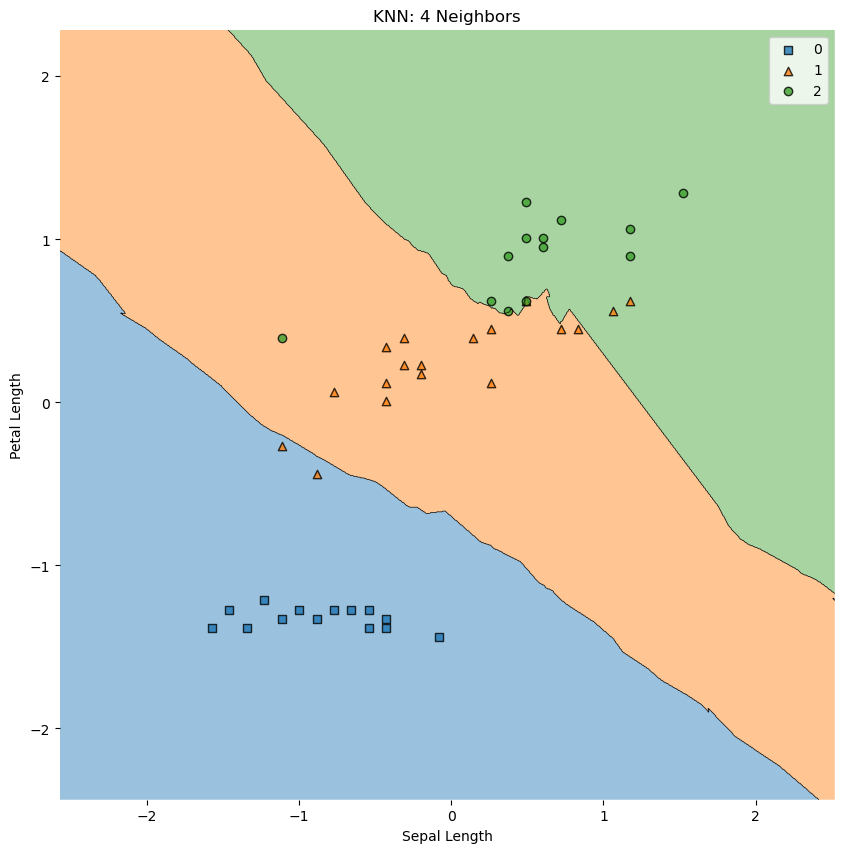

In [20]:
'''
Based on your work in 3, choose the number of neighbors to use and train a model with your training data. Check the accuracy score on both 
the training set and the test set. Use mlxtend.plot_decision_regions( ) to plot the decision regions for the training set and the test set.
'''

fig, ax = plt.subplots(figsize = (10,10))
plot_decision_regions(X_test.values, y_test.values, clf=knn, legend=2, ax=ax)


plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('KNN: 4 Neighbors')
plt.legend()
plt.show()

## 2. NFL draft combine 2009-2019
The NFL Scouting Combine is a week-long showcase occurring every February at Lucas Oil Stadium (and formerly at the RCA Dome until 2008) in Indianapolis, where college football players perform physical and mental tests in front of National Football League coaches, general managers, and scouts. (From Wikipedia)

We will use k-nearest neighbors with weight and height as features to predict 40 yard sprint time.

In [36]:
#nfl = pd.read_csv('/Users/swai8439/Desktop/Machine Learning/NFL_draft_combine_2009_2019.csv')
nfl = pd.read_csv('/Users/amberswain/Desktop/Machine Learning/NFL_draft_combine_2009_2019.csv')

In [37]:
nfl.head()

,Year,Player,Age,School,Height,Weight,Weight(lbs),Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,234.999721,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,260.999690,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,363.999567,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,202.999759,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,243.999710,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes


In [38]:
nfl.shape

(3477, 19)

The are 3477 players in the data set, with 19 columns. Let's look to see how many missing values there are.

In [39]:
nfl.isna().sum()

Year                      0
Player                    0
Age                     550
School                    0
Height                    0
Weight                    0
Weight(lbs)               0
Sprint_40yd             174
Vertical_Jump           697
Bench_Press_Reps        905
Broad_Jump              728
Agility_3cone          1217
Shuttle                1140
Drafted..tm.rnd.yr.    1223
BMI                       0
Player_Type               0
Position_Type             0
Position                  0
Drafted                   0
dtype: int64

We will drop the rows with missing 'Sprint_40yd' values.

In [40]:
nfl = nfl.dropna(subset='Sprint_40yd')

In [41]:
nfl.isna().sum()

Year                      0
Player                    0
Age                     500
School                    0
Height                    0
Weight                    0
Weight(lbs)               0
Sprint_40yd               0
Vertical_Jump           577
Bench_Press_Reps        830
Broad_Jump              605
Agility_3cone          1076
Shuttle                1002
Drafted..tm.rnd.yr.    1148
BMI                       0
Player_Type               0
Position_Type             0
Position                  0
Drafted                   0
dtype: int64

Our nfl draft combine data is ready to use for predicting sprint time from weight and height.

## Part 2: Predicting sprint times of players in NFL drafts

### (a) Predicting 40 yard sprint time using weight and height.
First, we will use the two variables weight and height as our only features.

1. Use seaborn to make a scatterplot of weight vs height with hue showing 40 yard sprint time.

2. Define the feature set $X$ (vectors containing the weights and heights of the players) and the target set $y$ (the sprint times). Make a train-test split using 30% of the data for a test set. 

3. Scale the $X$ variables using StandardScaler(). 

4. Use k-nearest neighbors with number of neighbors $n = 1, 2, 3, ..., 81$ and record the scores ($r^2$ values) for the training and test sets. Make a visualization of these scores.

    1. At which point does the $r^2$ score for the test set start to level off? (How many neighbors?)
     

    2. What is the $r^2$ score for the training set and test set at this point?

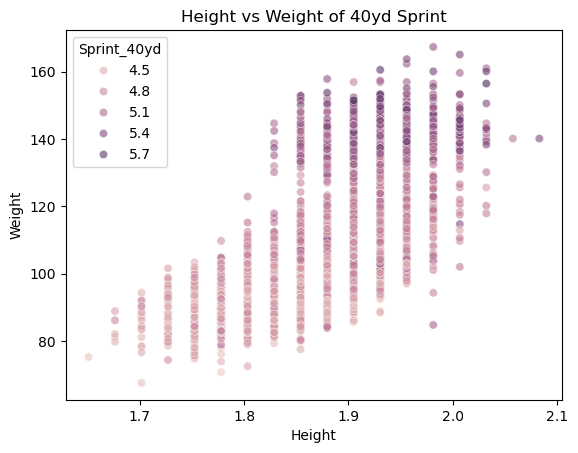

In [93]:
#1
fig, ax = plt.subplots()

sns.scatterplot(x = 'Height', 
                y = 'Weight', 
                data = nfl, 
                hue='Sprint_40yd', 
                alpha=0.6)
plt.title('Height vs Weight of 40yd Sprint')
plt.show()

In [94]:
#2
X = nfl[['Height', 'Weight']]
y = nfl['Sprint_40yd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=440) 
X_train['Height'].describe(), X_train['Weight'].describe()

(count    2312.000000
 mean        1.873063
 std         0.067382
 min         1.651000
 25%         1.828800
 50%         1.879600
 75%         1.930400
 max         2.057400
 Name: Height, dtype: float64,
 count    2312.000000
 mean      109.678321
 std        20.465483
 min        70.760410
 25%        92.986436
 50%       104.779837
 75%       125.758485
 max       167.375585
 Name: Weight, dtype: float64)

In [95]:
#3
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = ['Height', 'Weight'])
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = ['Height', 'Weight'])
X_train['Height'].describe(), X_train['Weight'].describe()

(count    2.312000e+03
 mean    -3.835456e-15
 std      1.000216e+00
 min     -3.296286e+00
 25%     -6.570393e-01
 50%      9.703112e-02
 75%      8.511015e-01
 max      2.736278e+00
 Name: Height, dtype: float64,
 count    2.312000e+03
 mean    -2.581557e-16
 std      1.000216e+00
 min     -1.902048e+00
 25%     -8.157881e-01
 50%     -2.394052e-01
 75%      7.858912e-01
 max      2.819858e+00
 Name: Weight, dtype: float64)

In [96]:
#4
knn=KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [97]:
knn.score(X_train, y_train)

0.7874884258752594

In [98]:
knn.score(X_test, y_test)

0.7122110202019899

In [99]:
train_accuracies = {}
test_accuracies = {}
neighbors = range(1,82)
for n in neighbors:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(X_train, y_train)
    train_accuracies[n] = knn.score(X_train, y_train)
    test_accuracies[n] = knn.score(X_test, y_test)

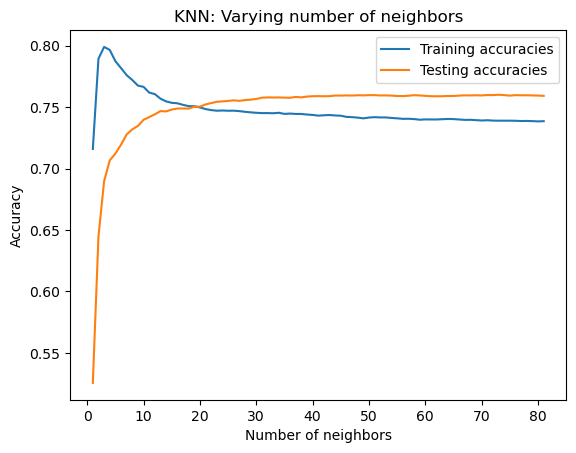

In [100]:
fig, ax = plt.subplots()
ax.plot(neighbors, train_accuracies.values(), label='Training accuracies')
ax.plot(neighbors, test_accuracies.values(), label='Testing accuracies')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN: Varying number of neighbors')
plt.legend()
plt.show()

In [101]:
'''
A: At which point does the r-squared score for the test set start to level off? (How many neighbors?)
    At about 25 neighbors

B: What is the r-squared score for the training set and test set at this point?
    Training: 0.747
    Test: 0.755
'''
print()

### (b) Predicting 40 yard sprint time using weight, height, and position. 
Let's add 'Position' to our features.

5. Convert the 'Position' names to numbers. You replace the 'Position' column or add a new column containing the position 'codes'. (Note that 'Position' is different than 'Position_Type'.)

6. Define a new feature set $X$ (containing the weight, height, and position of each player). Make a train-test split of $X$, $y$ using 30% of the data for a test set. 

7. Scale $X$ and test using k-nearest neighbors with $n = 1, 2, 3, ..., 81$. Record the scores ($r^2$ values) for the training and test sets and make a visualization of these scores.

    1. At which point does the $r^2$ score for the test set start to level off? (How many neighbors?)
     
    2. What is the $r^2$  score for the training set and test set at this point?
    
    3. Did adding 'Position' to our features help?

In [102]:
#5
print(nfl['Position'].unique())

['RB' 'DE' 'OG' 'FS' 'OLB' 'DT' 'OT' 'CB' 'SS' 'TE' 'ILB' 'C' 'FB' 'WR'
 'P' 'K' 'QB' 'LS' 'S' 'DB']


In [103]:
position_dict = {
    'RB' : 0,
    'DE' : 1, 
    'OG' : 2,
    'FS' : 3,
    'OLB' : 4,
    'DT' : 5,
    'OT' : 6,
    'CB' : 7,
    'SS' : 8,
    'TE' : 9,
    'ILB' : 10,
    'C' : 11,
    'FB' : 12,
    'WR' : 13,
    'P' : 14,
    'K' : 15,
    'QB' : 16,
    'LS' : 17,
    'S' : 18,
    'DB' : 19
}
nfl['Position Label'] = nfl['Position'].map(position_dict)
nfl.tail()

,Year,Player,Age,School,Height,Weight,Weight(lbs),Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted,Position Label
3468,2019,Tytus Howard,NaN,Alabama St.,1.9558,146.056743,321.999617,5.05,74.93,21.0,261.62,8.34,4.87,NaN,38.183236,offense,offensive_lineman,OT,No,6
3469,2019,Chauncey Gardner-Johnson,NaN,Florida,1.8034,95.254398,209.999750,4.48,91.44,17.0,297.18,7.03,4.20,NaN,29.288755,defense,defensive_back,S,No,18
3470,2019,Ashton Dulin,NaN,Malone University (Ohio),1.8542,97.522360,214.999744,4.43,96.52,13.0,307.34,7.00,4.22,NaN,28.365539,offense,backs_receivers,WR,No,13
3473,2018,Minkah Fitzpatrick\FitzMi00,21.0,Alabama,1.8542,91.172066,200.999761,4.46,83.82,14.0,307.34,NaN,NaN,Miami Dolphins / 1st / 11th pick / 2018,26.518481,defense,defensive_back,DB,Yes,19
3475,2019,Ugo Amadi,NaN,Oregon,1.7526,90.264882,198.999763,4.51,82.55,18.0,292.10,7.21,4.19,NaN,29.386861,defense,defensive_back,S,No,18


In [104]:
#6
X = nfl[['Height', 'Weight', 'Position Label']]
y = nfl['Sprint_40yd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=440) 
X_train['Height'].describe(), X_train['Weight'].describe(), X_train['Position Label'].describe()

(count    2312.000000
 mean        1.873063
 std         0.067382
 min         1.651000
 25%         1.828800
 50%         1.879600
 75%         1.930400
 max         2.057400
 Name: Height, dtype: float64,
 count    2312.000000
 mean      109.678321
 std        20.465483
 min        70.760410
 25%        92.986436
 50%       104.779837
 75%       125.758485
 max       167.375585
 Name: Weight, dtype: float64,
 count    2312.000000
 mean        7.194637
 std         5.003262
 min         0.000000
 25%         3.000000
 50%         7.000000
 75%        12.000000
 max        19.000000
 Name: Position Label, dtype: float64)

7. Scale $X$ and test using k-nearest neighbors with $n = 1, 2, 3, ..., 81$. Record the scores ($r^2$ values) for the training and test sets and make a visualization of these scores.

    1. At which point does the $r^2$ score for the test set start to level off? (How many neighbors?)
     
    2. What is the $r^2$  score for the training set and test set at this point?
    
    3. Did adding 'Position' to our features help?

In [107]:
#7
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = ['Height', 'Weight', 'Position Label'])
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = ['Height', 'Weight', 'Position Label'])
X_train['Height'].describe(), X_train['Weight'].describe()

(count    2.312000e+03
 mean     6.146563e-18
 std      1.000216e+00
 min     -3.296286e+00
 25%     -6.570393e-01
 50%      9.703112e-02
 75%      8.511015e-01
 max      2.736278e+00
 Name: Height, dtype: float64,
 count    2.312000e+03
 mean    -1.229313e-17
 std      1.000216e+00
 min     -1.902048e+00
 25%     -8.157881e-01
 50%     -2.394052e-01
 75%      7.858912e-01
 max      2.819858e+00
 Name: Weight, dtype: float64)

In [110]:
train_accuracies = {}
test_accuracies = {}
neighbors = range(1,82)
for n in neighbors:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(X_train, y_train)
    train_accuracies[n] = knn.score(X_train, y_train)
    test_accuracies[n] = knn.score(X_test, y_test)

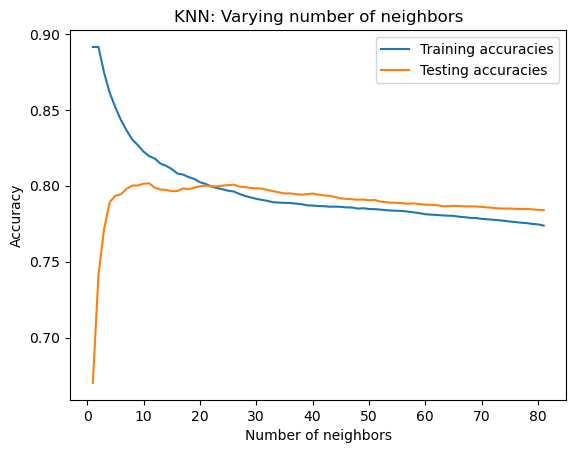

In [111]:
fig, ax = plt.subplots()
ax.plot(neighbors, train_accuracies.values(), label='Training accuracies')
ax.plot(neighbors, test_accuracies.values(), label='Testing accuracies')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN: Varying number of neighbors')
plt.legend()
plt.show()

In [113]:
'''
A. At which point does the r-squared score for the test set start to level off? (How many neighbors?)
    At about 25 neighbors
B. What is the r-squared score for the training set and test set at this point?
    train: 0.798
    test: 0.800
C. Did adding 'Position' to our features help?
   Yes, it made it better for the train and test sets, which means that the information gain of Position is worthwhile to use for predicting
   40yd sprint.
'''
print(test_accuracies)

{1: 0.6701617713468171, 2: 0.7411321848028463, 3: 0.7714818075101373, 4: 0.7892087392046496, 5: 0.7934088799488528, 6: 0.794403735775219, 7: 0.7979804951537555, 8: 0.8001457710992476, 9: 0.8001864330320119, 10: 0.8013418666864467, 11: 0.8016058625207231, 12: 0.7987258424276933, 13: 0.7975190292727596, 14: 0.7972535909587586, 15: 0.7964180429727974, 16: 0.7965090774200404, 17: 0.7982347439565217, 18: 0.7977811644911653, 19: 0.7987468286627092, 20: 0.7996366998713886, 21: 0.8000760620883638, 22: 0.7996693148137641, 23: 0.7996375181596064, 24: 0.8000794773621269, 25: 0.8004130416751469, 26: 0.8007425920338693, 27: 0.7994534585220187, 28: 0.7990628214611859, 29: 0.7985671480979357, 30: 0.7983144580132625, 31: 0.7981108518032329, 32: 0.7972375431089461, 33: 0.7964470006620578, 34: 0.7956774730216896, 35: 0.7949049180059793, 36: 0.7949723238917437, 37: 0.7944124334692912, 38: 0.7941404591464385, 39: 0.794511750265863, 40: 0.7948576461109477, 41: 0.7941770024730697, 42: 0.7935887020511748, 43

### (c) Predicting 40 yard sprint time using weight, height, and player type. 
Let's try 'Player_Type' ('offense', 'defense', 'special_teams') instead of 'Position'.

8. Repeat 5-7 using 'Player_Type' instead of 'Position'.

In [116]:
print(nfl['Player_Type'].unique())

['offense' 'defense' 'special_teams']


In [121]:
player_dict = {
    'offense' : 0,
    'defense' : 1, 
    'special_teams' : 2
}
nfl['Player Label'] = nfl['Player_Type'].map(player_dict)

X = nfl[['Height', 'Weight', 'Player Label']]
y = nfl['Sprint_40yd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=440) 

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = ['Height', 'Weight', 'Player Label'])
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = ['Height', 'Weight', 'Player Label'])
X_train['Height'].describe(), X_train['Weight'].describe(), X_train['Player Label'].describe()

(count    2.312000e+03
 mean    -3.835456e-15
 std      1.000216e+00
 min     -3.296286e+00
 25%     -6.570393e-01
 50%      9.703112e-02
 75%      8.511015e-01
 max      2.736278e+00
 Name: Height, dtype: float64,
 count    2.312000e+03
 mean    -2.581557e-16
 std      1.000216e+00
 min     -1.902048e+00
 25%     -8.157881e-01
 50%     -2.394052e-01
 75%      7.858912e-01
 max      2.819858e+00
 Name: Weight, dtype: float64,
 count    2.312000e+03
 mean    -2.458625e-17
 std      1.000216e+00
 min     -9.190720e-01
 25%     -9.190720e-01
 50%     -9.190720e-01
 75%      8.472576e-01
 max      2.613587e+00
 Name: Player Label, dtype: float64)

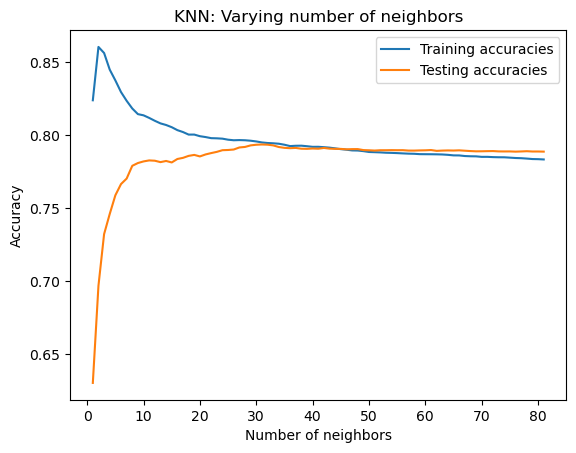

In [122]:
train_accuracies = {}
test_accuracies = {}
neighbors = range(1,82)
for n in neighbors:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(X_train, y_train)
    train_accuracies[n] = knn.score(X_train, y_train)
    test_accuracies[n] = knn.score(X_test, y_test)

fig, ax = plt.subplots()
ax.plot(neighbors, train_accuracies.values(), label='Training accuracies')
ax.plot(neighbors, test_accuracies.values(), label='Testing accuracies')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN: Varying number of neighbors')
plt.legend()
plt.show()

In [124]:
'''
A. At which point does the r-squared score for the test set start to level off? (How many neighbors?)
    At about 30 neighbors
B. What is the r-squared score for the training set and test set at this point?
    train: 0.795
    test: 0.793
C. Did adding 'Player Type' to our features help?
   No, it made both sets worse but by a really small amount(only by 0.2%-0.3% difference).
'''
print(test_accuracies)

{1: 0.630047241741088, 2: 0.6967248538308393, 3: 0.7321063332365345, 4: 0.7459367875783912, 5: 0.7587450611769628, 6: 0.7664236400652005, 7: 0.7701939034946278, 8: 0.7789526137586401, 9: 0.7808537569017338, 10: 0.7819622748915167, 11: 0.7826510397419838, 12: 0.7824419109716924, 13: 0.7814740587557969, 14: 0.7822714605067066, 15: 0.7812574023400193, 16: 0.7836247467814048, 17: 0.7844100080924773, 18: 0.7857673852828527, 19: 0.7864266989452258, 20: 0.7853853224394204, 21: 0.7867452117709277, 22: 0.7876768658909999, 23: 0.7885154738072834, 24: 0.7896569158430444, 25: 0.7898027873718808, 26: 0.79012588137746, 27: 0.791528436687674, 28: 0.7918930069907508, 29: 0.7929625792563554, 30: 0.793396387347412, 31: 0.7935778913984644, 32: 0.7934463424263927, 33: 0.7929535267998049, 34: 0.7918342431938299, 35: 0.7912688611983745, 36: 0.7910320018349486, 37: 0.7912146827010956, 38: 0.7906722971035778, 39: 0.7905902930635176, 40: 0.7908188919984758, 41: 0.7906736292314817, 42: 0.7911939147912237, 43: 0

### (d) Predicting 40 yard sprint time using weight, height, position, and player type. 
Now, we'll try all four of these features.

9. Find a good choice for number of neighbors to use to train a knn model. Train and test the model and report your $r^2$ score and rsme.

In [130]:
X = nfl[['Height', 'Weight', 'Position Label','Player Label']]
y = nfl['Sprint_40yd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=440) 

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = ['Height', 'Weight', 'Position Label', 'Player Label'])
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = ['Height', 'Weight', 'Position Label', 'Player Label'])
#X_train['Height'].describe(), X_train['Weight'].describe(), X_train['Player Label'].describe(), X_train['Position Label'].describe()

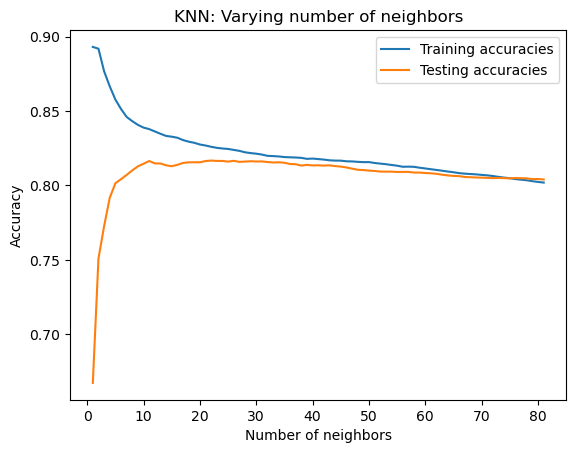

In [131]:
train_accuracies = {}
test_accuracies = {}
neighbors = range(1,82)
for n in neighbors:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(X_train, y_train)
    train_accuracies[n] = knn.score(X_train, y_train)
    test_accuracies[n] = knn.score(X_test, y_test)

fig, ax = plt.subplots()
ax.plot(neighbors, train_accuracies.values(), label='Training accuracies')
ax.plot(neighbors, test_accuracies.values(), label='Testing accuracies')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN: Varying number of neighbors')
plt.legend()
plt.show()